# 1. Librairies

In [42]:
"""Import libraries"""

import re 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt # create the plot of the graph 
import seaborn as sns # used for plot interactive graph.
sns.set()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # To do wordcloud
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams # Change default plot size

import squarify
#!pip install squarify

%matplotlib inline #display plot right inside Jupyter
%config InlineBackend.figure_format='svg' # graphics in SVG format are more sharp and legible 

# 2. Import & Clean DataFrame

In [3]:
data = pd.read_csv(r'/Users/borispetelle/Documents/GitHub/Projects/Google Play Store - Visualization/googleplaystore.csv')

In [4]:
"""Clean the DataFrame"""

# Drop duplicates apps
data.drop_duplicates(subset=['App'],keep='first',inplace=True)


# Drop Missing Values from Rating column
total_missing = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total Missing', 'Percent']) #check all NaN
data.dropna(how ='any', inplace = True)
data.reset_index(drop=True, inplace=True)

# Convert data review to integer
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
new = []
for i in range(len(data.Size)):
    if 'k' in str(data.Size[i]):
        new.append((float(''.join(re.findall(r'[\d\.]+', str(data.Size[i]))))*(10**3)))
    elif 'M' in str(data.Size[i]):
        new.append((float(''.join(re.findall(r'[\d\.]+', str(data.Size[i]))))*(10**6)))
    else:
        new.append(0)
data.drop(columns='Size', inplace=True)
data['Size'] = new
data.loc[data['Size']==0, 'Size'] = round(data['Size'].mean(),2)

# Clean Size
data['Size'].replace('Varies with device', np.nan, inplace = True )

# Convert Installs to integer
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

# Convert Price to float
data.Price = data.Price.apply(lambda x: x.replace('$','')).astype(float)


In [5]:
"""Exporting to excel to work on it in Tableau"""

data.to_excel('clean_googleplaystore.xlsm')

# 3. Visualization and analysis

Text(0.5, 1.0, 'Number of apps per category')

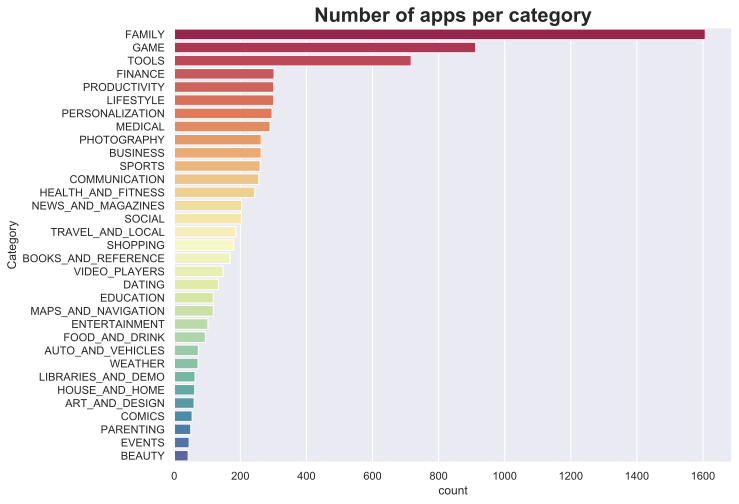

In [43]:
"""WHICH APPS ARE AVAILABLE IN GOOGLE PLAY STORE ?"""

rcParams['figure.figsize']=10,8
sns.countplot(y="Category", data=data, order=data['Category'].value_counts().index, palette="Spectral")
plt.title('Number of apps per category',size = 20, fontweight='bold')

# TPaying apps have a median rating above the rating of free apps.
#But if we look the first top 10 paid apps, there are not well rated 
 

Text(0.5, 1.1, 'Ratings & Reviews distributions')

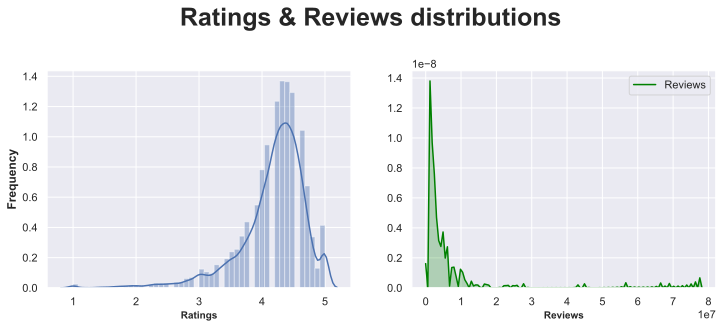

In [44]:
"""HOW RATINGS & REVIEWS ARE DISTRIBUTED ?"""

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4)) 
sns.distplot((data['Rating']), ax=axes[0]);
sns.kdeplot((data.Reviews), color="Green", shade = True,ax=axes[1])

axes[0].set_xlabel('Ratings', fontsize=10, fontweight='bold')
axes[1].set_xlabel('Reviews', fontsize=10, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')

plt.suptitle(t='Ratings & Reviews distributions', x=0.5, y= 1.1, fontsize=25, fontweight='bold')

# The average apps rating in Google Play Store is around 4.5, which is very high.
# Most of the applications have less than 1M in reviews.

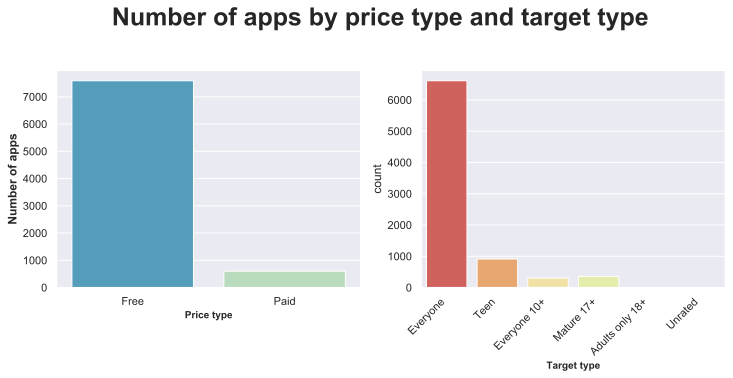

In [58]:
"""WHAT TYPE OF APPS ARE AVAILABLE ?"""

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4)) 
sns.countplot(x='Type', data=data, ax=axes[0], palette="GnBu_r")
sns.countplot(x='Content Rating', data=data, ax=axes[1], palette="Spectral")

axes[0].set_xlabel('Price type', fontsize=10, fontweight='bold')
axes[1].set_xlabel('Target type', fontsize=10, fontweight='bold')
axes[0].set_ylabel('Number of apps', fontsize=12, fontweight='bold')

plt.suptitle(t='Number of apps by price type and target type', x=0.5, y= 1.1, fontsize=25, fontweight='bold')

plt.xticks(rotation=45, horizontalalignment='right');

#92% of the apps are free,  in other word, most of the time « we are the product ».
#80% of the applications are designed for every category of person.

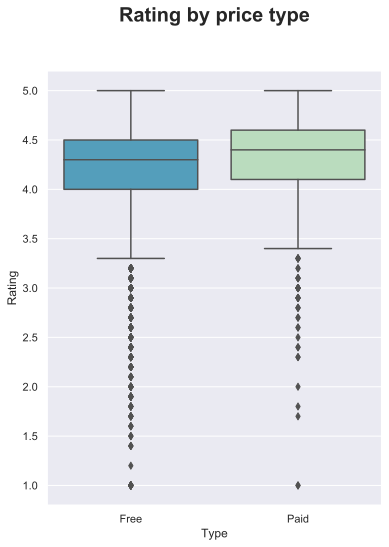

In [45]:
"""ARE FREE APPS BETTER RATED THAN PAID APPS ?"""

rcParams['figure.figsize']=6,8
sns.boxplot(x='Type', y='Rating', data=data, palette="GnBu_r")
plt.title('Rating by price type', x=0.5, y= 1.1, fontsize=20, fontweight='bold');

#Paying apps have a median rating above the rating of free apps.
#But if we look the first top 10 paid apps, there are not well rated (bellow).


In [46]:
"""Top 10 Expensive Apps"""

data.sort_values(by=["Price","Rating"], ascending=False)[["App", "Price","Rating","Category"]].head(15)

,App,Price,Rating,Category
3305,I'm Rich - Trump Edition,400.00,3.6,LIFESTYLE
4107,I Am Rich Pro,399.99,4.4,FAMILY
3175,most expensive app (H),399.99,4.3,FAMILY
4114,I am Rich,399.99,4.3,FINANCE
4101,I Am Rich Premium,399.99,4.1,FINANCE
4109,I am rich (Most expensive app),399.99,4.1,FINANCE
4099,I am Rich Plus,399.99,4.0,FAMILY
4118,I AM RICH PRO PLUS,399.99,4.0,FINANCE
3301,💎 I'm rich,399.99,3.8,LIFESTYLE
4097,I am rich,399.99,3.8,LIFESTYLE


Text(0.5, 1.1, 'Most popular category, by number of installs')

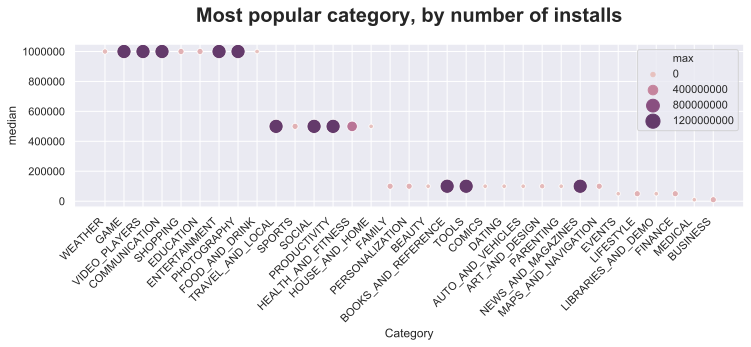

In [47]:
"""WHICH TYPES OF APPS ARE THE MOST DOWNLOADED ?"""
               
cutoffs=[0, 1000, 5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,1000000000,5000000000,10000000000,10000000001]
names=['<1k','1k','5k','10k','50k','100k','500k','1M','5M','10M','50M','1B','5B','10B']
data['installs_dct']=pd.cut(data['Installs'],cutoffs,labels=names)


dfg=data[['Category','Installs','installs_dct']].groupby('Category').agg({'Installs':['median', 'max']})\
.sort_values(by=('Installs','median'),ascending=False).reset_index()

rcParams['figure.figsize']=12,3

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True);

chart = sns.scatterplot(x=dfg.Category, y=dfg.Installs['median'], size=dfg.Installs['max'], sizes=(20, 200), hue=dfg.Installs['max'], palette=cmap, data=data);
plt.xticks(rotation=45, horizontalalignment='right');
plt.title('Most popular category, by number of installs', x=0.5, y= 1.1, size=20, fontweight='bold')

# 50% of users have these top 9 types of apps bellow
# But the types of apps that have the maximum off dowloads are : Game, Video Player ….. 


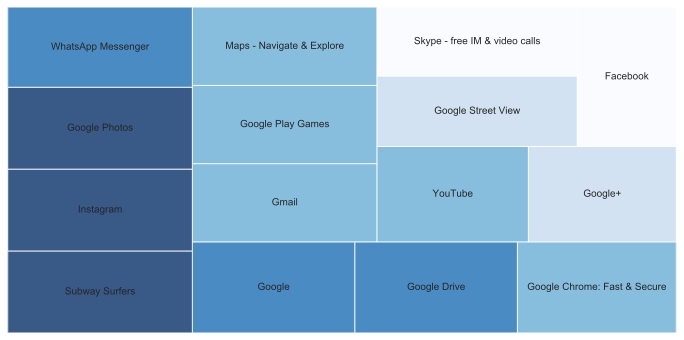

In [55]:
"""WHICH APPS ARE THE MOST DOWNLOADED ?"""

rcParams['figure.figsize']=12,6
df = data.sort_values(by=["Installs","Rating"], ascending=False)[["App", "Installs","Rating"]].head(15)

cmap = matplotlib.cm.Blues
mini=min(df.Rating)
maxi=max(df.Rating)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(x)) for x in df["Rating"]]

squarify.plot(sizes=df['Rating'], label=df['App'], alpha=.8, color=colors )
plt.axis('off')
plt.show()

# Mostly Google Apps have most installations

In [49]:
"""Top 10 apps with the most reviews"""

apps = data[data["Reviews"] >= 200]
apps.sort_values(by="Reviews", ascending=False)[["App", "Reviews", "Rating"]].head(15)

,App,Reviews,Rating
1870,Facebook,78158306,4.1
287,WhatsApp Messenger,69119316,4.4
1871,Instagram,66577313,4.5
286,Messenger – Text and Video Chat for Free,56642847,4.0
1290,Clash of Clans,44891723,4.6
3034,Clean Master- Space Cleaner & Antivirus,42916526,4.7
1274,Subway Surfers,27722264,4.5
2764,YouTube,25655305,4.3
5681,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
1280,Clash Royale,23133508,4.6


Text(0.5, 1.1, "Communication's apps by rating and downloads")

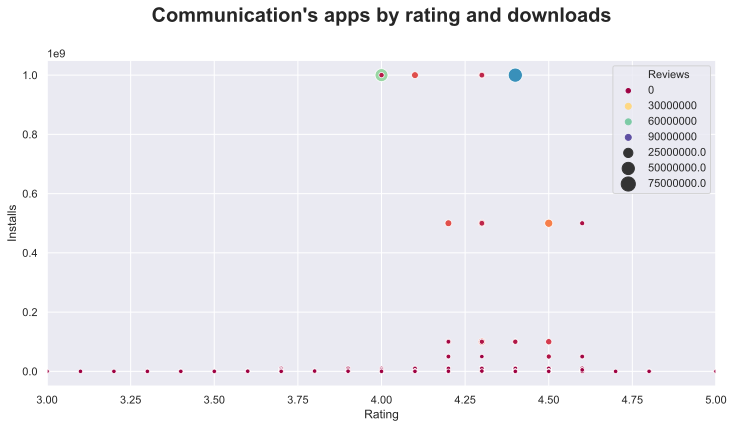

In [56]:
"""Communication's apps by rating and downloads"""

rcParams['figure.figsize']=12,6
data_com = data[data.Category=='COMMUNICATION']
chart = sns.scatterplot(x=data_com.Rating, y=data_com.Installs, size=data_com.Reviews, sizes=(20, 200), hue=data.Reviews, palette='Spectral', data=data_com);
chart.set_xlim(3,5)
plt.title("Communication's apps by rating and downloads", x=0.5, y= 1.1, size=20, fontweight='bold')

Text(0.5, 1.1, 'Price vs Rating for free apps')

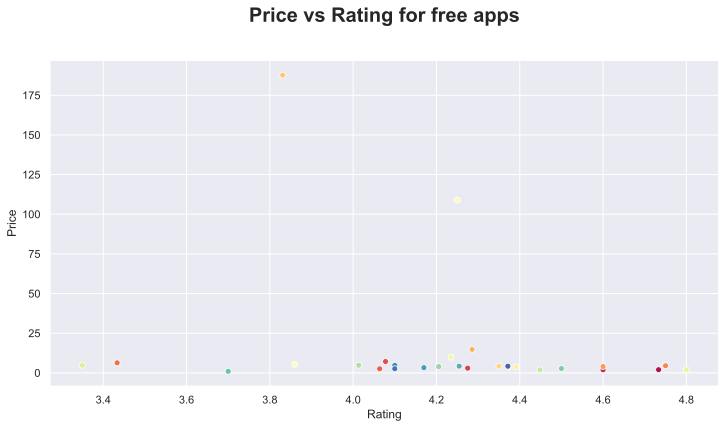

In [57]:
"""Price vs Rating for free apps"""

rcParams['figure.figsize']=12,6
data_paid = data[data.Type=='Paid']
dfb=data_paid[['Category','Price','Rating']].groupby('Category').agg('mean').reset_index()
chart = sns.scatterplot(x=dfb.Rating, y=dfb.Price, hue=dfb.Category, palette='Spectral',legend=False, data=dfb);
plt.title('Price vs Rating for free apps', x=0.5, y= 1.1, size=20, fontweight='bold')


In [52]:
"""Top 10 rating apps (with min 200 reviews)"""

apps = data[data["Reviews"] >= 200]
apps.sort_values(by=["Rating", "Reviews", "Installs"], ascending=False)[["App", "Rating", "Reviews"]].head(10)

,App,Rating,Reviews
7326,JW Library,4.9,922752
967,Six Pack in 30 Days - Abs Workout,4.9,272337
77,Tickets + PDA 2018 Exam,4.9,197136
534,"Learn Japanese, Korean, Chinese Offline & Free",4.9,133136
1014,StrongLifts 5x5 Workout Gym Log & Personal Tra...,4.9,66791
5327,PixPanda - Color by Number Pixel Art Coloring ...,4.9,55723
97,"ipsy: Makeup, Beauty, and Tips",4.9,49790
2984,Hungry Hearts Diner: A Tale of Star-Crossed Souls,4.9,46253
965,Lose Belly Fat in 30 Days - Flat Stomach,4.9,38098
3834,Solitaire: Decked Out Ad Free,4.9,37302


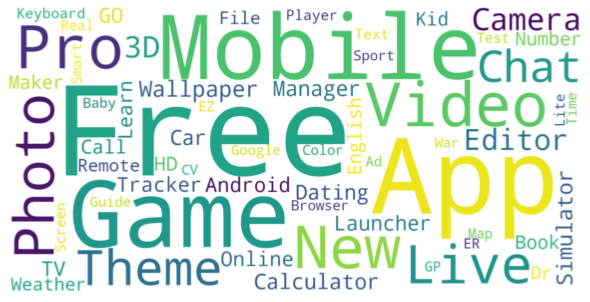

In [53]:
"""WHICH ARE THE MOST RECORING WORDS FOR APPS NAMES ?"""

wordcloud1 = WordCloud(max_font_size=350, collocations=False, \
                       max_words=60, width=1600, height=800, \
                       background_color="white").generate(' '.join(data.App))
plt.figure(figsize=(8,4))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()